In [57]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [58]:
df_mexico = pd.read_csv("listingsMexico.csv")
df_tokyo = pd.read_csv("listingstokyo.csv")

In [59]:
def filtrar_atipicos_std(datos, campo, limite=3):
    promedio = datos[campo].mean()
    desviacion = datos[campo].std()
    return datos[(datos[campo] > promedio - limite * desviacion) & (datos[campo] < promedio + limite * desviacion)]

In [60]:
def filtrar_atipicos_iqr(datos, campo):
    Q1 = datos[campo].quantile(0.25)
    Q3 = datos[campo].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return datos[(datos[campo] >= limite_inferior) & (datos[campo] <= limite_superior)]

In [61]:
def graficar_caja(datos, titulo):
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=datos, palette="coolwarm")
    plt.title(titulo)
    plt.xticks(rotation=90)
    plt.show()

🔍 Mostrando valores atípicos originales en México...


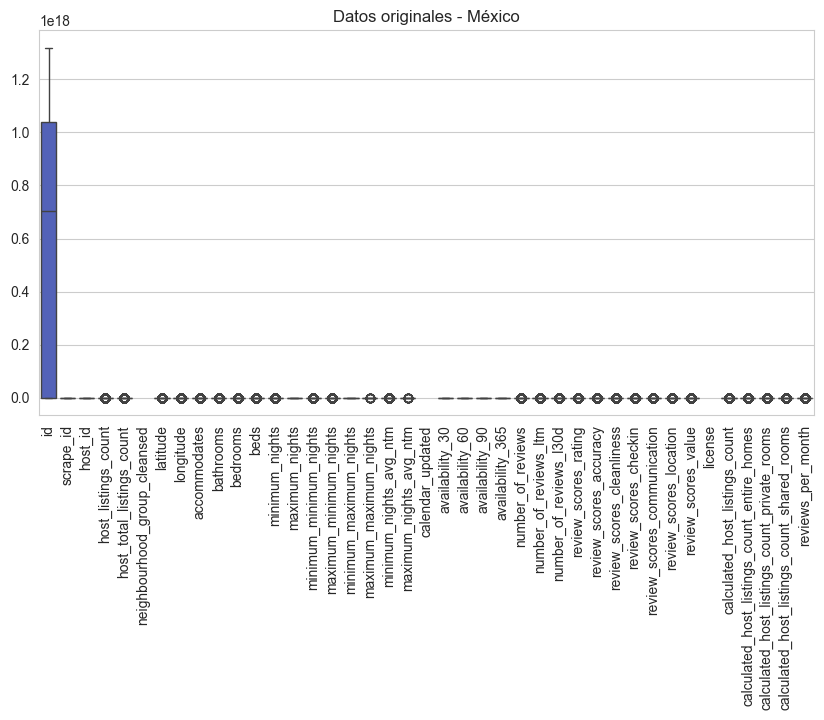

🔍 Mostrando valores atípicos originales en el País...


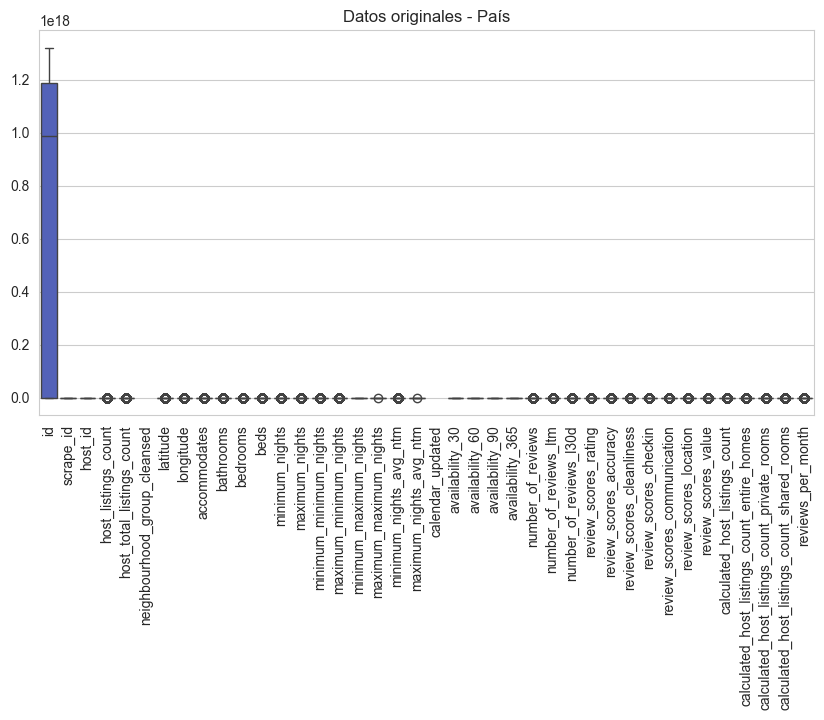

In [62]:
print("🔍 Mostrando valores atípicos originales en México...")
graficar_caja(df_mexico, "Datos originales - México")

print("🔍 Mostrando valores atípicos originales en el País...")
graficar_caja(df_tokyo, "Datos originales - País")

In [63]:
for columna in df_mexico.select_dtypes(include=[np.number]).columns:
    df_mexico = filtrar_atipicos_iqr(df_mexico, columna)
    df_mexico = filtrar_atipicos_std(df_mexico, columna)

for columna in df_pais.select_dtypes(include=[np.number]).columns:
    df_tokyo = filtrar_atipicos_iqr(df_tokyo, columna)
    df_tokyo = filtrar_atipicos_std(df_tokyo, columna)


Datos de México después de eliminar valores atípicos


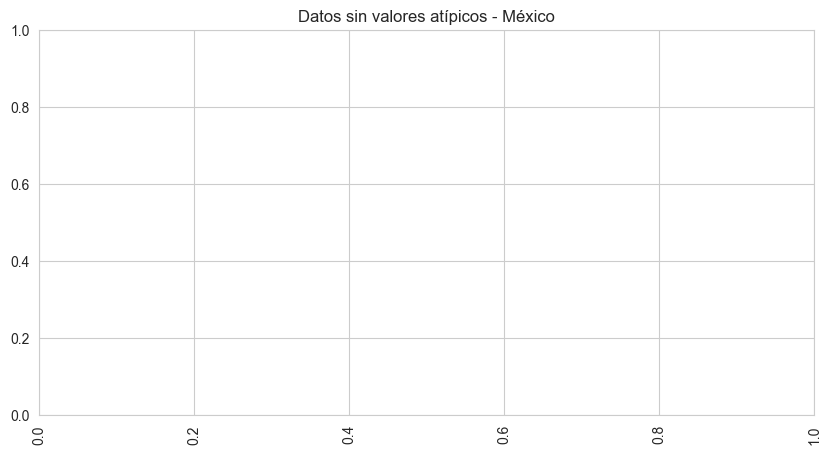

Datos del País después de eliminar valores atípicos


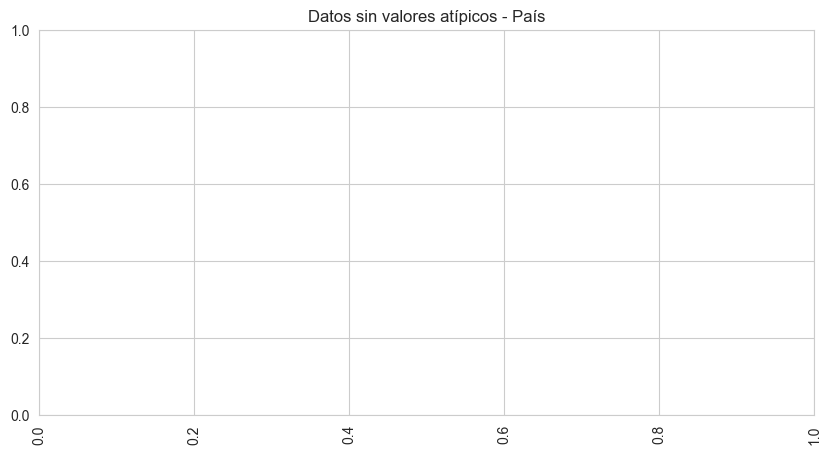

In [64]:
print("Datos de México después de eliminar valores atípicos")
graficar_caja(df_mexico, "Datos sin valores atípicos - México")

print("Datos del País después de eliminar valores atípicos")
graficar_caja(df_tokyo, "Datos sin valores atípicos - País")


In [66]:
df_mexico.to_csv("Mexico_procesado.csv", index=False)
df_tokyo.to_csv("Pais_sin_outliers.csv", index=False)

print("Archivos oficiales guardados")

Archivos oficiales guardados
